# Linear Regression

The idea that you can fit a best-fit line to a scatterplot of inputs (independent variables) and outputs (dependent variables), and do so in higher dimensions, is fundamental for many machine learning algorithms. With these materials, you'll learn how to use linear regression to predict outcomes based on data. We'll cover the basics, explore the key concepts, and practice applying this powerful technique to real-world problems. By the end, you'll be able to build, evaluate, and interpret linear regression models, giving you valuable skills for making data-driven decisions in various fields. Whether you're new to this or looking to enhance your knowledge, this class will help you master the essentials of linear regression.

## Regression Basics


Conceptually, I like to imagine what a human would try to do when looking at a scatterplot of (X,Y) coordinates, in order to imagine a best fitting straight line. 

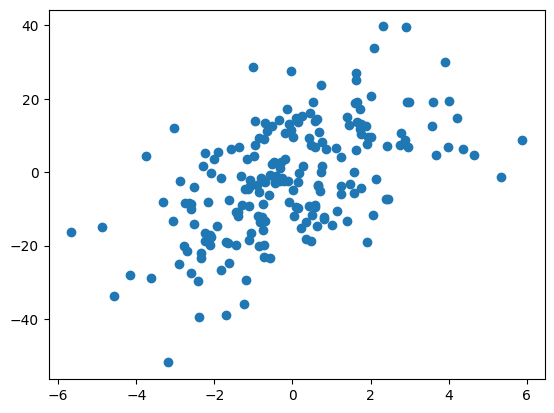

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = np.random.normal(0,2,(200,2))
b = np.random.normal(3,2,(X.shape[1]))
y = X@b + np.random.normal(0,3,(X.shape[0],))

plt.scatter(X[:,0],y)

In [160]:
b

array([4.0260111 , 6.67684632])

In [161]:


Xy = np.hstack([X[:,], y.reshape(-1, 1)])
pca = PCA(n_components=Xy.shape[-1])

Xytrain,Xytest = train_test_split(Xy,test_size=.3,shuffle=False,random_state=42)

In [162]:
Xpca = pca.fit_transform(Xytrain)

In [167]:
pca.components_[:2]

array([[ 0.07662388,  0.09884413,  0.99214849],
       [ 0.84416365, -0.53595569, -0.01179966]])

In [ ]:
np.hstack((Xpca[:,:-1], np.zeros(Xpca[])))

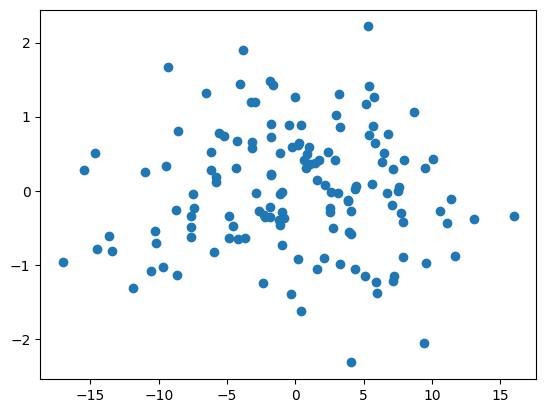

In [155]:
plt.scatter(
    Xpca[:,0],
    Xpca[:,-1]
)

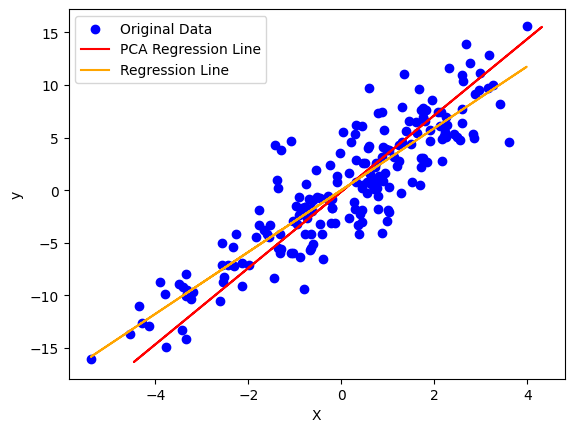

In [157]:

reg_pca = LinearRegression()
reg_pca.fit(Xpca[:,:-1], Xpca[:, -1])


Xy_pca_pred = reg_pca.predict(Xpca[:,:-1])


Xy_pca_inv = np.hstack((Xpca[:,:-1], Xy_pca_pred.reshape(-1, 1)))
Xy_orig_pred = pca.inverse_transform(Xy_pca_inv)

coefs = np.linalg.pinv(X.T@X)@(X.T@y)
pred = X@coefs


plt.scatter(X[:,0], y, color='blue', label='Original Data')
plt.plot(Xy_orig_pred[:, 0], Xy_orig_pred[:, 1], color='red', label='PCA Regression Line')
plt.plot(X[:, 0], pred, color='orange', label='Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


In [168]:
Xy_pca_pred

array([ 1.54097628e-17,  2.73839473e-16,  1.18667440e-15, -1.72901090e-15,
       -7.40599227e-16, -3.06663441e-16,  1.48311052e-16, -8.44127943e-16,
       -1.88417882e-15,  1.61311147e-15,  4.98914015e-16,  1.23281838e-15,
       -6.15300063e-16, -2.00639279e-15, -1.39711141e-15,  1.58564708e-15,
        1.98403757e-15, -1.13882622e-15,  9.18756401e-16, -2.70374708e-16,
       -1.08997505e-15, -1.33169496e-15, -1.49210827e-15,  4.12252968e-16,
        3.86407282e-16,  2.29448229e-15, -1.05847822e-16, -4.06496698e-17,
       -1.27232654e-15,  1.83970759e-15,  5.38404110e-16, -1.90573405e-15,
       -2.27010310e-15,  4.35368231e-16, -4.62231520e-16,  2.78561259e-15,
        1.03630439e-15, -8.44004181e-17,  6.35654021e-16,  6.48258187e-16,
       -1.56036615e-15, -1.15977089e-15, -1.41700472e-15, -5.57212248e-16,
       -9.88734840e-16,  2.82965168e-15,  3.04547866e-15, -5.89243491e-16,
        6.93778844e-16,  9.82080857e-16,  8.74831964e-16, -6.15007092e-16,
       -7.87438920e-16, -

In [143]:
from sklearn.metrics import mean_absolute_error,root_mean_squared_error


In [144]:
print(mean_absolute_error(y,Xy_orig_pred[:, -1]))
print(mean_absolute_error(y,pred))

print(root_mean_squared_error(y,Xy_orig_pred[:, -1]))
print(root_mean_squared_error(y,pred))

0.21125990039296738
1.7539279830714196
0.2543146672741513
2.1483778330768675
